In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense, InputLayer

import tensorflow as tf

from time import time

%matplotlib inline

In [2]:
df_train = pd.read_csv("/data/MNIST/mnist_train.csv", header=None)
df_test = pd.read_csv("/data/MNIST/mnist_test.csv", header=None)

In [4]:
df_train.shape, df_test.shape

((60000, 785), (10000, 785))

In [5]:
28 * 28 

784

/Users/abulbasar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


Text(0.5,1,'5')

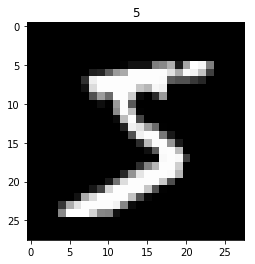

In [11]:
plt.imshow(df_train.iloc[0, 1:].reshape((28, 28)), cmap="gray")
plt.title(df_train.iloc[0, 0])

In [21]:
X_train = df_train.iloc[:, 1:].values/255
y_train = df_train.iloc[:, 0].values
X_test = df_test.iloc[:, 1:].values/255
y_test = df_test.iloc[:, 0].values

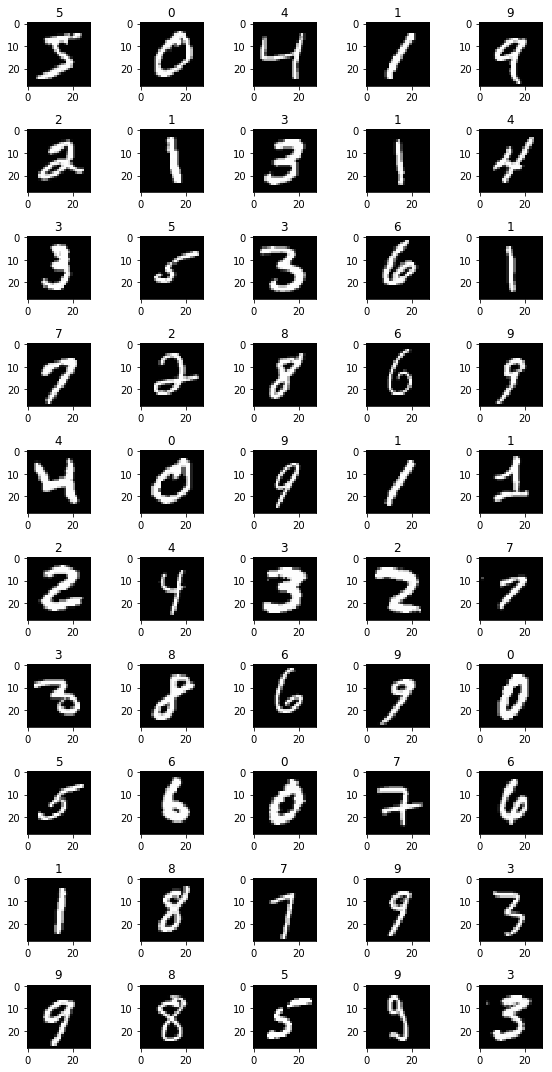

In [18]:
fig, _ = plt.subplots(10, 5, figsize = (8, 15))
for i, ax, in enumerate(fig.axes):
    ax.imshow(X_train[i].reshape(28, 28), cmap = "gray")
    ax.set_title(y_train[i])
plt.tight_layout()

In [22]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

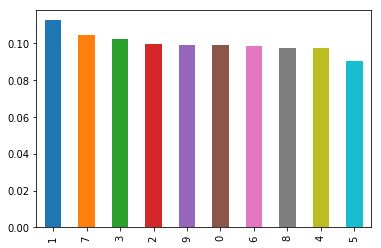

In [26]:
(pd.Series(y_train).value_counts()/len(y_train)).plot.bar()

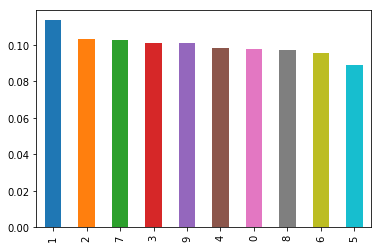

In [27]:
(pd.Series(y_test).value_counts()/len(y_test)).plot.bar()

In [34]:
n_x = X_train.shape[1]

tf.set_random_seed(1)
np.random.seed(1)

tensor_board = keras.callbacks.TensorBoard(log_dir="/tmp/tf/logs/%d" % time())

model = keras.Sequential()
model.add(InputLayer((n_x, )))
model.add(Dense(units=10, activation="softmax"))

model.summary()

model.compile(loss=keras.losses.categorical_crossentropy
            , metrics=["accuracy"]
            , optimizer="adam")

model.fit(X_train, keras.utils.to_categorical(y_train)
          , batch_size=256
          , validation_data = (X_test, keras.utils.to_categorical(y_test))
          , epochs=10
          , verbose = 1
          , callbacks=[tensor_board])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.8459 - acc: 0.7981 - val_loss: 0.4697 - val_acc: 0.8846
Epoch 2/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.4266 - acc: 0.8895 - val_loss: 0.3662 - val_acc: 0.9030
Epoch 3/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.3608 - acc: 0.9032 - val_loss: 0.3287 - val_acc: 0.9112
Epoch 4/10
60000/60000 [==============================] - 2s 34us/step - lo

In [35]:
n_x = X_train.shape[1]

tf.set_random_seed(1)
np.random.seed(1)

tensor_board = keras.callbacks.TensorBoard(log_dir="/tmp/tf/logs/%d" % time())

model = keras.Sequential()
model.add(InputLayer((n_x, )))
model.add(Dense(units=100, activation="relu"))
model.add(Dense(units=10, activation="softmax"))

model.summary()

model.compile(loss=keras.losses.categorical_crossentropy
            , metrics=["accuracy"]
            , optimizer="adam")

model.fit(X_train, keras.utils.to_categorical(y_train)
          , batch_size=256
          , validation_data = (X_test, keras.utils.to_categorical(y_test))
          , epochs=10
          , verbose = 1
          , callbacks=[tensor_board])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.4734 - acc: 0.8734 - val_loss: 0.2487 - val_acc: 0.9308
Epoch 2/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.2244 - acc: 0.9378 - val_loss: 0.1901 - val_acc: 0.9445
Epoch 3/10
60000/60000 [==============================] - 3s 46us/step - loss:

In [ ]:
y_test_pred = model.predict_classes(X_test).flatten()
plot_confusion_matrix(confusion_matrix(y_test, y_test_pred))